In [212]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

1. A) Draw a circle with radius a=1 and has the center r at (2,2)

The equation for a fuzzy surface is expressed by G(x) = exp(-(|x-r|-a)/ σ). x is a two-dimensional vector.

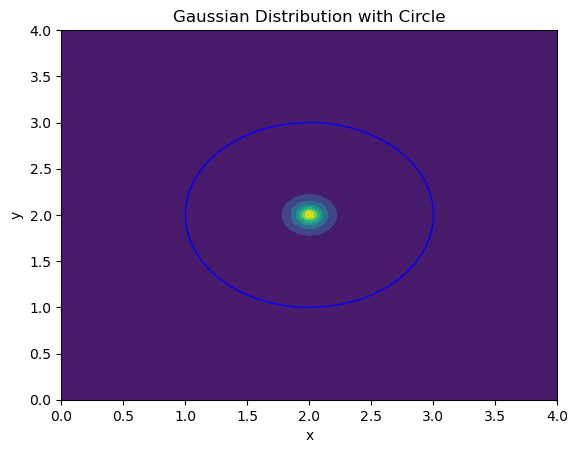

In [213]:
# Define the Gaussian function
def gaussian(points, center, radius, sigma):
    points = points - center
    x = np.linalg.norm(points, axis=1) - radius
    g = np.exp(-x / sigma)
    return g

# Define the center and radius of the circle
center = [2, 2]
radius = 1

# Define the limits of the plot
x_min, x_max = center[0] - 2 * radius, center[0] + 2 * radius
y_min, y_max = center[1] - 2 * radius, center[1] + 2 * radius

# Create a meshgrid of points to evaluate the Gaussian function
x = np.linspace(x_min, x_max, 100)
y = np.linspace(y_min, y_max, 100)
X, Y = np.meshgrid(x, y)
points = np.column_stack((X.flatten(), Y.flatten()))

# Evaluate the Gaussian function at each point in the meshgrid
Z = gaussian(points, center, radius, 0.1)
Z = Z.reshape(X.shape)

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the Gaussian surface
ax.contourf(X, Y, Z, cmap='viridis')

# Plot the circle
circle = Circle(center, radius, color='blue', fill=False)
ax.add_patch(circle)

# Set the x and y limits
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

# Add labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Gaussian Distribution with Circle')

# Show the plot
plt.show()


A new circumference can be drawn by plotting all the points x where the value of 1/G(x)=C.

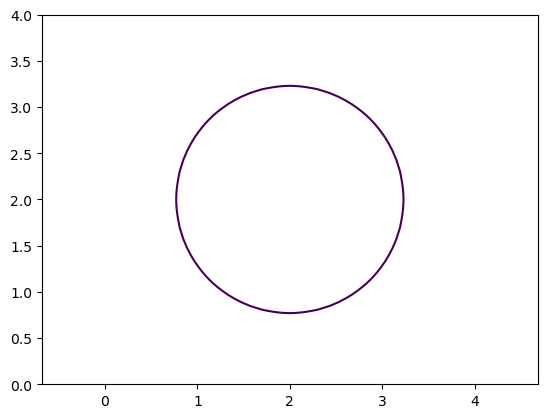

In [214]:
# Plot the circle where G(x) = 0.1
C = 1 / 0.1

#We want to plot all the points x where the value of 1/G(x) = C, which is equivalent to G(x) = 1/C. So, we can rearrange this equation to get 1/G(x) - C = 0.
Z_new = 1 / Z - C

plt.contour(X, Y, Z_new, levels=[0]) # Plot the new circumference where Z_new = 0

# Show the plot
plt.axis('equal')
plt.show()

In [172]:
def plot_gaussian(sigma, c):
    # Calculates gaussian distribution
    def gaussian(points, center, radius, sigma):
        points = points - center
        x = np.linalg.norm(points, axis=1) - radius
        g = np.exp(-x / sigma)
        return 1 / g

    # Finds points closest to a given value
    def find_points(matrix, values, threshold):
        indices = np.where(np.abs(values - threshold) <= limit)[0]
        return matrix[indices]

    # Create a matrix of points
    x = np.linspace(0, 4, 150)
    all_x = np.column_stack((np.repeat(x, len(x)), np.tile(x, len(x))))

    # Call gaussian function with given parameters
    center=[2, 2]
    radius=1
    s = gaussian(all_x, center, radius, sigma)

    # Find points closest to a given value of C
    limit=0.1
    points = find_points(all_x, s, c)

    # Plot the results
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("Sigma = {}, C = {} ± ({})".format(sigma, c, limit))
    circle = plt.Circle(center, radius, color='blue', fill=False)
    plt.gca().add_artist(circle)
    plt.axis('equal')
    plt.scatter(points[:, 0], points[:,1], s=5, color='red')
    # plt.savefig(dpi=1000)
    plt.show()


1. B) In one plot, draw the original circle and new circumferences for σ =0.1 and C=0.8, 1.0, and 1.2. 

In this equation, a value of 1/G(x)=C will be satisfied by x either inside or outside the original circle, not both.

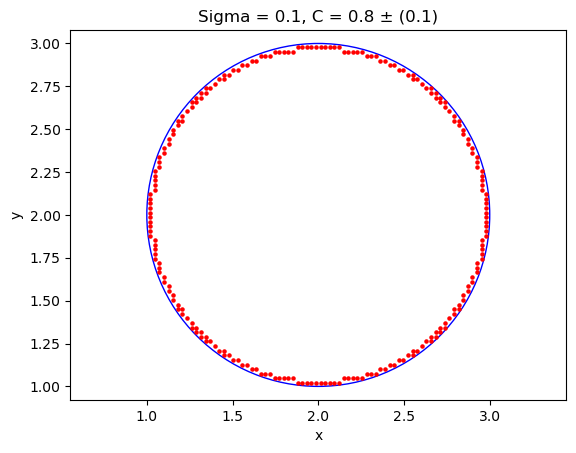

In [173]:
plot_gaussian(sigma=0.1, c=0.8)

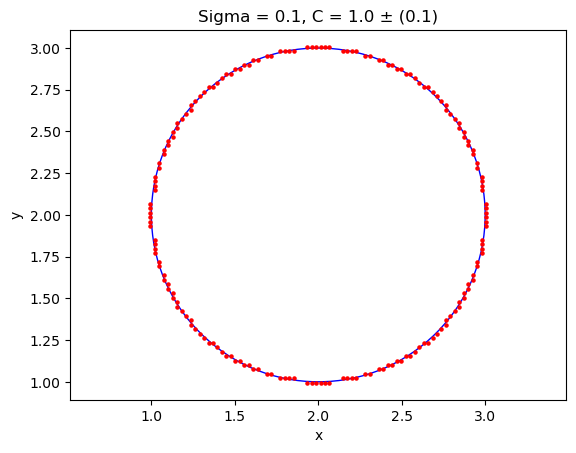

In [174]:
plot_gaussian(sigma=0.1, c=1.0)

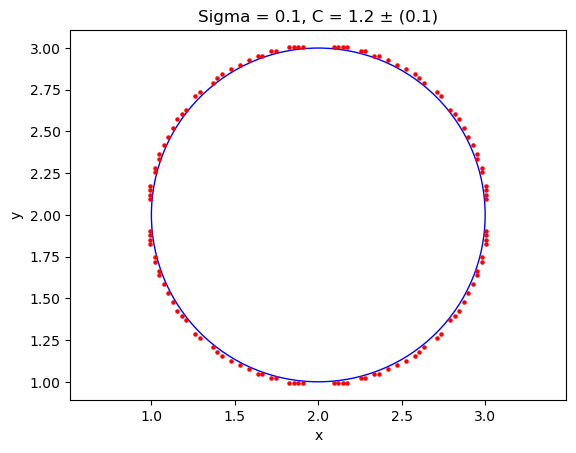

In [175]:
plot_gaussian(sigma=0.1, c=1.2)

1. C) In another plot, draw the original circle and new circumferences for C=0.8 and σ =0.1, 0.3, 0.5, and 0.7.

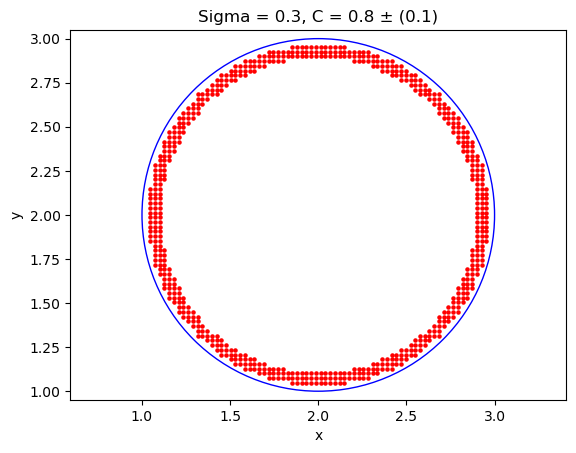

In [176]:
plot_gaussian(c=0.8, sigma=0.3)

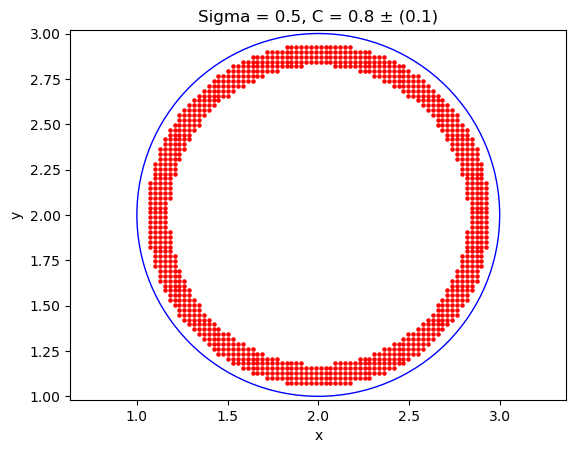

In [177]:
plot_gaussian(c=0.8, sigma=0.5)

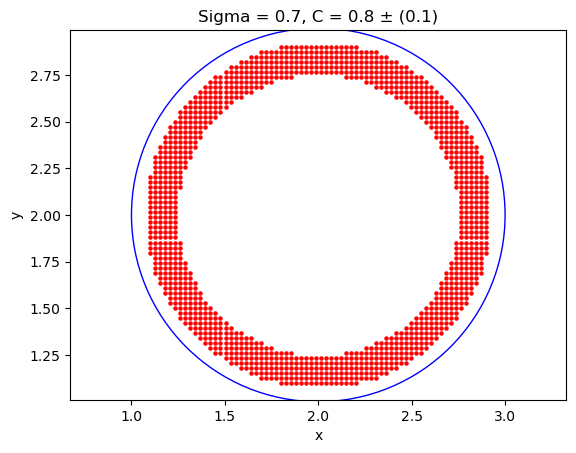

In [178]:
plot_gaussian(c=0.8, sigma=0.7)

1. D) In another plot, draw the original circle and new circumferences for C=1.2 and σ =0.1, 0.3, 0.5, and 0.7

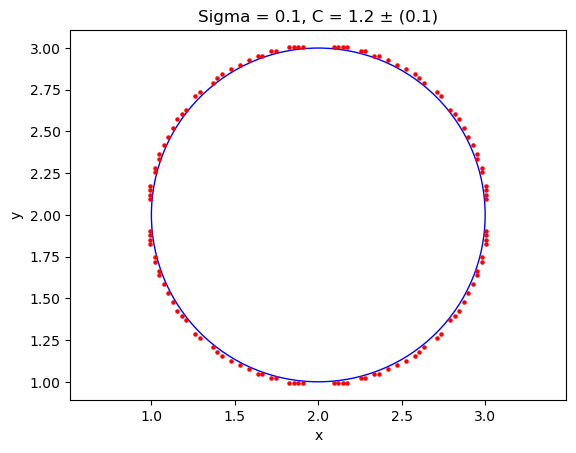

In [179]:
plot_gaussian(c=1.2, sigma=0.1)

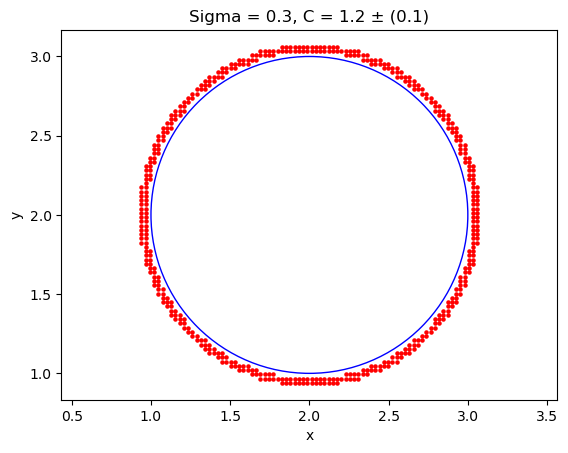

In [180]:
plot_gaussian(c=1.2, sigma=0.3)

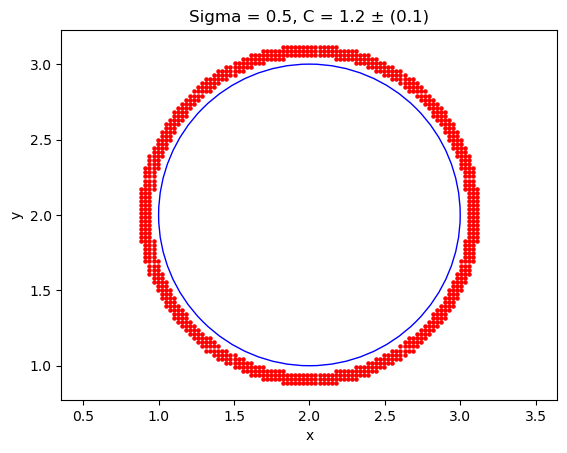

In [181]:
plot_gaussian(c=1.2, sigma=0.5)

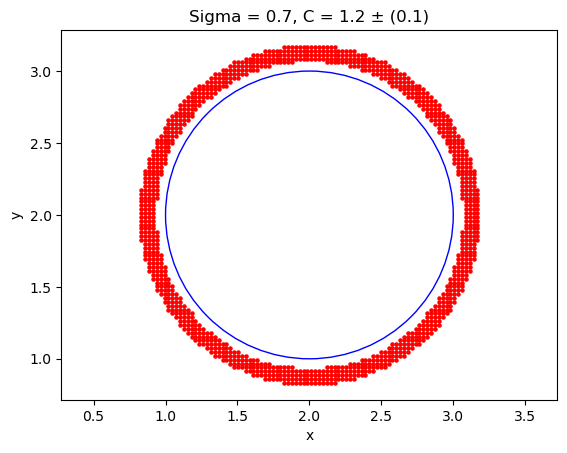

In [182]:
plot_gaussian(c=1.2, sigma=0.7)

2. A) Draw two circles. One with radius a1=1 and has the center r1 at (2,2), and another with radius a2=1.2 and has the center r2 at (4,2) The equation for a fuzzy surface is expressed by G(x) = Σi exp(-(|x- ri|-ai)/ σ), where i runs over the number of atoms. 

In the above case, i goes from 1 to 2. A new surface combining both the circles can be drawn by plotting all the points x where the value of 1/G(x)=C

In [183]:
def find_closest_points(sigma, c):
    # define the grid of points to calculate the distribution over
    x = np.linspace(0, 8, 300)
    all_x = np.column_stack((np.repeat(x, len(x)), np.tile(x, len(x))))
    
    # calculate the combined gaussian distribution for the given centers, radii, and sigma
    center1 = [2, 2]
    radius1 = 1
    center2 = [4, 2]
    radius2 = 1.2
    s = gaussian_distribution(all_x, center1, radius1, center2, radius2, sigma)
    
    # find the points with gaussian distribution closest to c, within the given threshold
    threshold = 0.1
    points = closest_coordinates(all_x, s, c, threshold)
    
    # plot the results
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f"Sigma = {sigma}, C = {c} \xb1 (<= {threshold})")
    circle1 = plt.Circle(center1, radius1, color='blue', fill=False)
    plt.gca().add_artist(circle1)
    circle2 = plt.Circle(center2, radius2, color='orange', fill=False)
    plt.gca().add_artist(circle2)
    plt.axis('equal')
    plt.scatter(points[:, 0], points[:,1], s=5, color='red')
    plt.show()
    
def gaussian_distribution(points, center1, radius1, center2, radius2, sigma):
    # calculates the gaussian distribution for each circle centered at center1 and center2, with radii radius1 and radius2 and standard deviation sigma
    g1 = gaussian_distribution_for_circle(points, center1, radius1, sigma)
    g2 = gaussian_distribution_for_circle(points, center2, radius2, sigma)
    return np.add(g1, g2)

def gaussian_distribution_for_circle(points, center, radius, sigma):
    # calculates the gaussian distribution for a circle centered at center with radius radius and standard deviation sigma
    points = points - center
    x = np.linalg.norm(points, axis=1) - radius
    x /= sigma
    g = np.exp(-x)
    return g

def closest_coordinates(matrix, s, c, limit):
    # find the points with gaussian distribution closest to c, within the given threshold
    diff = np.abs(s - c)
    indices = np.where(diff <= limit)[0]
    return matrix[indices]



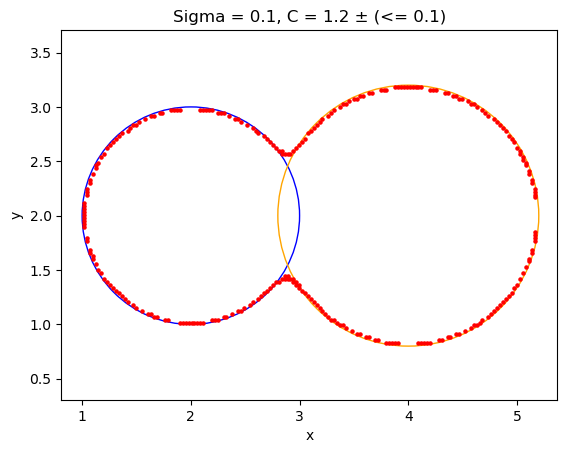

In [184]:
find_closest_points(sigma = 0.1, c = 1.2)

In [185]:
def find_closest_points(sigma, c_threshold):
    def gaussian_distribution(points, center1, center2, radius1, radius2, sigma):
        points1 = points - center1
        x1 = np.linalg.norm(points1, axis=1) - radius1
        g1 = np.exp(-x1/sigma)

        points2 = points - center2
        x2 = np.linalg.norm(points2, axis=1) - radius2
        g2 = np.exp(-x2/sigma)

        g = g1 + g2
        c = 1/g
        return c

    def get_closest_points(matrix, c_values, c_threshold, limit):
       diff = np.abs(c_values - c_threshold)
       indices = np.where(diff <= limit)[0]
       return matrix[indices]

    x = np.linspace(0, 8, 300).reshape(-1)
    all_points = np.column_stack((np.repeat(x, len(x)), np.tile(x, len(x))))

    center1 = [2, 2]
    radius1 = 1
    center2 = [4, 2]
    radius2 = 1.2
#     sigma = 0.1

    c_values = gaussian_distribution(all_points, center1, center2, radius1, radius2, sigma)
#     c_threshold = 0.8
    limit = 0.1
    points = get_closest_points(all_points, c_values, c_threshold, limit)

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Sigma = {sigma}, C = {c_threshold} \xb1 (<= {limit})')
    circle1 = plt.Circle(center1, radius1, color='blue', fill=False)
    plt.gca().add_artist(circle1)
    circle2 = plt.Circle(center2, radius2, color='orange', fill=False)
    plt.gca().add_artist(circle2) 
    plt.axis('equal')
    plt.scatter(points[:, 0], points[:, 1], s=2, color='red')
    plt.show()


B) In one plot, draw the original circle and new circumferences for σ =0.1 and C=0.8, 1.0, and
1.2.

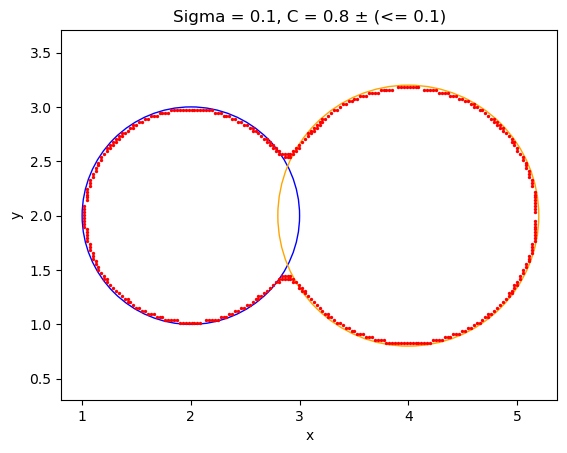

In [186]:
find_closest_points(sigma=0.1, c_threshold=0.8)

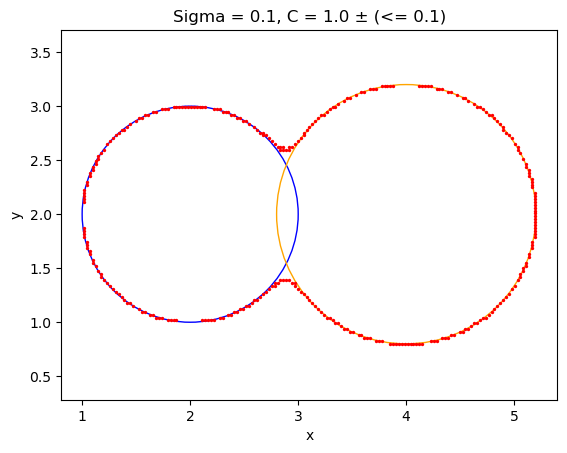

In [187]:
find_closest_points(sigma=0.1, c_threshold=1.0)

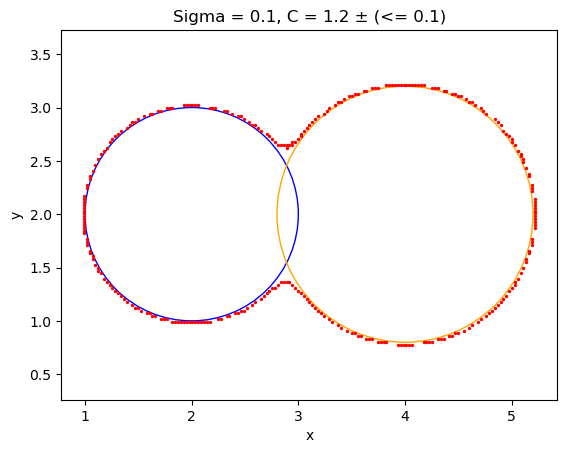

In [188]:
find_closest_points(sigma=0.1, c_threshold=1.2)

C) In another plot, draw the original circle and new circumferences for C=0.8 and σ =0.1, 0.3,
0.5, and 0.7.

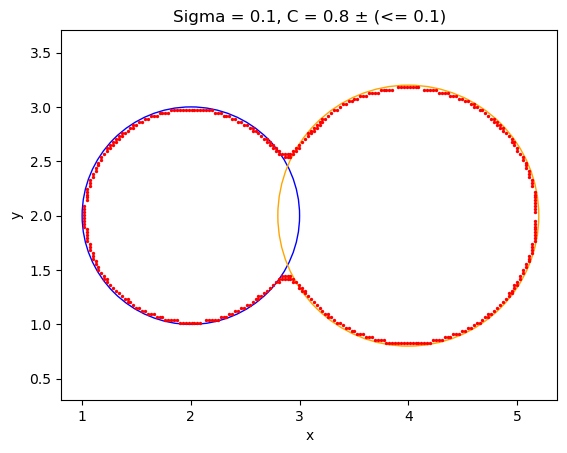

In [189]:
find_closest_points(c_threshold=0.8, sigma=0.1)

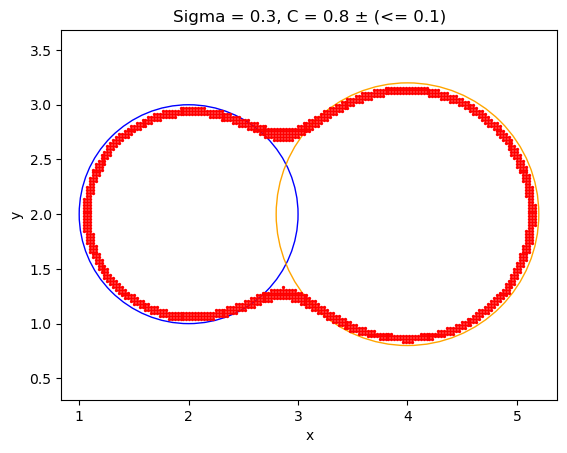

In [190]:
find_closest_points(c_threshold=0.8, sigma=0.3)

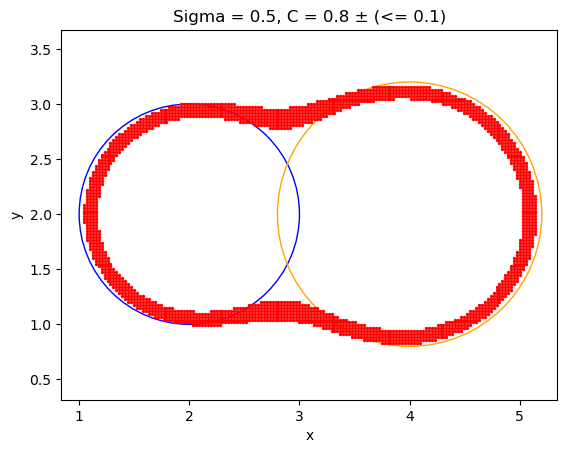

In [191]:
find_closest_points(c_threshold=0.8, sigma=0.5)

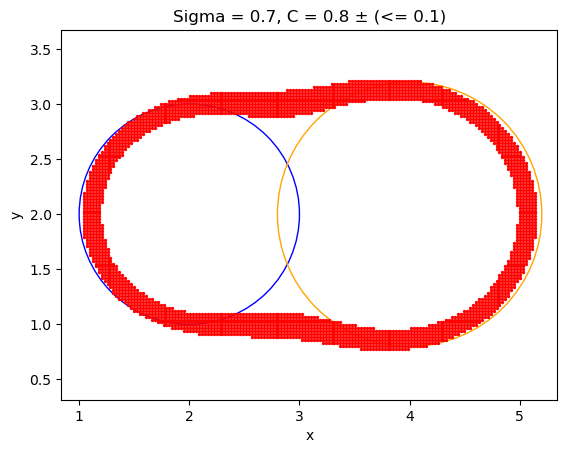

In [192]:
find_closest_points(c_threshold=0.8, sigma=0.7)

D) In another plot, draw the original circle and new circumferences for C=1.2 and σ =0.1, 0.3,
0.5, and 0.7.

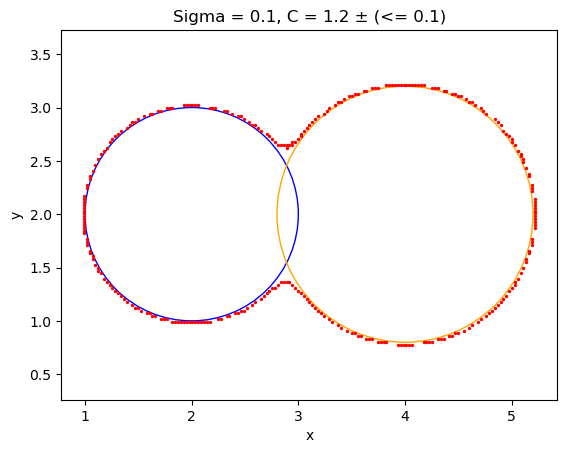

In [193]:
find_closest_points(c_threshold=1.2, sigma=0.1)

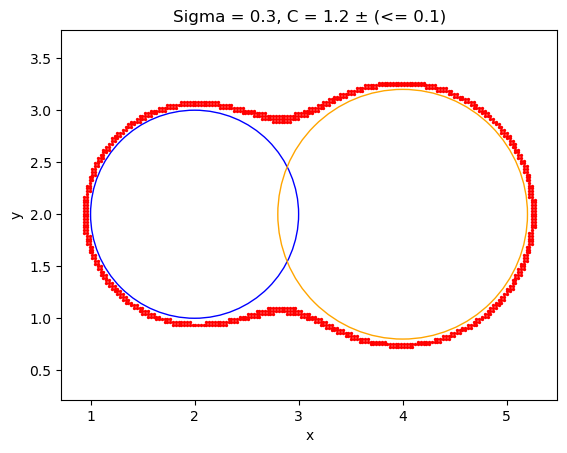

In [194]:
find_closest_points(c_threshold=1.2, sigma=0.3)

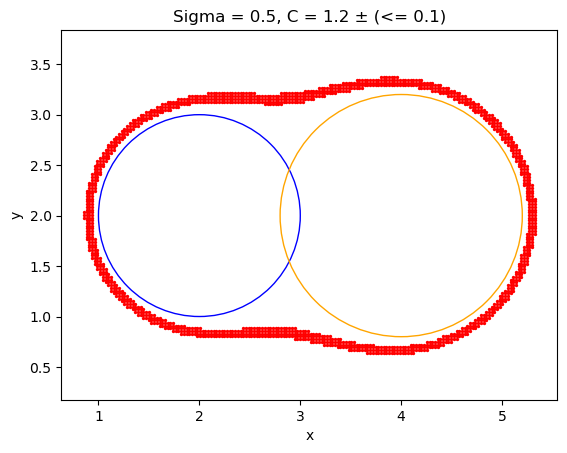

In [195]:
find_closest_points(c_threshold=1.2, sigma=0.5)

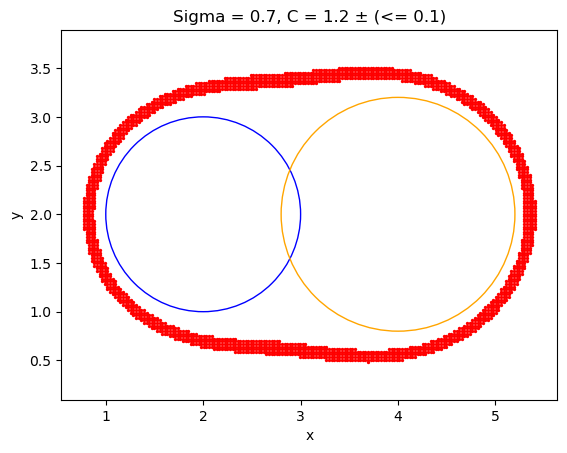

In [196]:
find_closest_points(c_threshold=1.2, sigma=0.7)